In [1]:
import pandas as pd

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from subprocess import check_output

In [3]:
startup = pd.read_csv('startup_funding.csv')

In [7]:
# Understanding the data 
print(startup.shape)

(2372, 10)


In [8]:
# To know how many uniqe variable are present in the data
print(startup.nunique())

SNo                 2372
Date                 698
StartupName         2001
IndustryVertical     743
SubVertical         1364
CityLocation          71
InvestorsName       1885
InvestmentType         7
AmountInUSD          328
Remarks               69
dtype: int64


In [9]:
# looking forward for how many cells consists of NA in the dta set
print(startup.isnull().sum())

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64


In [10]:
startup.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-17,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02-08-17,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02-08-17,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02-08-17,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02-08-17,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [11]:
#Exploring the amount distribution
startup["AmountInUSD"] = startup["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))

In [13]:
startup["AmountInUSD"].head()

0    1300000.0
1          NaN
2          NaN
3     500000.0
4     850000.0
Name: AmountInUSD, dtype: float64

In [14]:
startup["AmountInUSD"].min()

16000.0

In [15]:
startup["AmountInUSD"].max()

1400000000.0

In [19]:
startup["AmountInUSD"].std()

64031175.12873626

In [17]:
startup["AmountInUSD"].median()

1070000.0

In [28]:
# From the above analysis the distribution of amount varies when we see y]the difference between minimum and maximum its is very huge
#So here we Tranforming the amount data using log, where log tranformation consiers the min number and maximum number and brings down the miximum number to do further analysis

startup["AmountInUSD_log"] = np.log(startup["AmountInUSD"]+1)

C:\Users\santhosh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


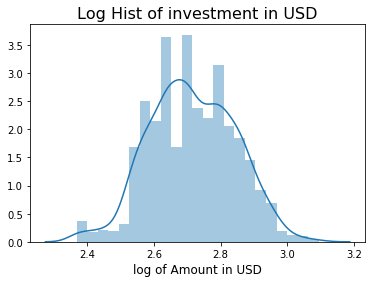

In [29]:
#Representing the tranformed data in histogram because it is continuous data
plt.figure()
sns.distplot(startup['AmountInUSD_log'].dropna())
plt.xlabel('log of Amount in USD', fontsize=12)
plt.title("Log Hist of investment in USD", fontsize=16)
plt.show()


In [30]:
#Different type of investments in the startup cultre
startup_investements = startup['InvestmentType']

In [32]:
startup_investements.value_counts()

Seed Funding      1271
Private Equity    1066
SeedFunding         30
PrivateEquity        1
Crowd Funding        1
Crowd funding        1
Debt Funding         1
Name: InvestmentType, dtype: int64

In [33]:
# Going forward to Invester names
startup_invester_Names = startup['InvestorsName']

In [50]:
startup_invester_Names.value_counts()[:20]

Undisclosed Investors       33
Undisclosed investors       27
Indian Angel Network        24
Ratan Tata                  24
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             14
undisclosed investors       11
Undisclosed Investor        10
Brand Capital               10
RoundGlass Partners         10
Undisclosed                  9
SAIF Partners                9
Accel Partners               9
Undisclosed investor         9
Info Edge (India) Ltd        8
Tiger Global                 7
Nexus Venture Partners       7
Unitus Seed Fund             7
YouWeCan Ventures            7
Name: InvestorsName, dtype: int64

In [41]:
Investments = print(startup_invester_Names.value_counts( )[:20])

Undisclosed Investors       33
Undisclosed investors       27
Indian Angel Network        24
Ratan Tata                  24
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             14
undisclosed investors       11
Undisclosed Investor        10
Brand Capital               10
RoundGlass Partners         10
Undisclosed                  9
SAIF Partners                9
Accel Partners               9
Undisclosed investor         9
Info Edge (India) Ltd        8
Tiger Global                 7
Nexus Venture Partners       7
Unitus Seed Fund             7
YouWeCan Ventures            7
Name: InvestorsName, dtype: int64


In [46]:
Investments

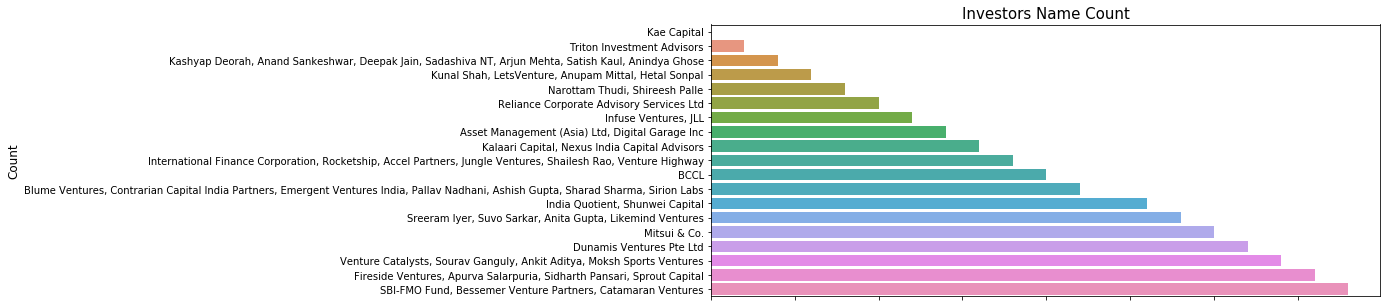

In [52]:
plt.figure(figsize = (12,5))
g = sns.barplot(x=startup_invester_Names.index[:20],y=startup_invester_Names.values[:20])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Investors Name Count", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.show()

In [56]:
#considering Location
startup_location = startup['CityLocation'].value_counts()[:10]

In [57]:
startup_location

Bangalore    627
Mumbai       446
New Delhi    381
Gurgaon      240
Pune          84
Noida         78
Hyderabad     76
Chennai       66
Ahmedabad     35
Jaipur        25
Name: CityLocation, dtype: int64

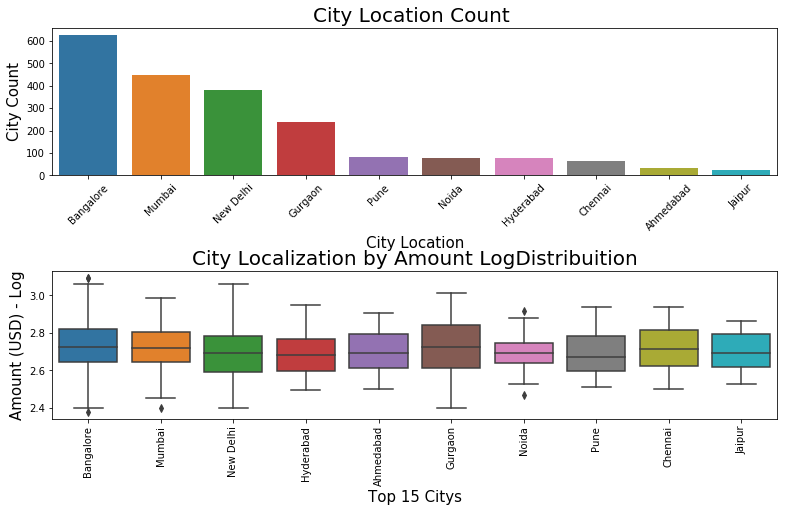

In [62]:
plt.figure(figsize=(13,7))

plt.subplot(211)
sns.barplot(x=startup_location.index[:20], y=startup_location.values[:20])
plt.xticks(rotation=45)
plt.xlabel('City Location', fontsize=15)
plt.ylabel('City Count', fontsize=15)
plt.title("City Location Count ", fontsize=20)

plt.subplot(212)
g = sns.boxplot(x='CityLocation', y="AmountInUSD_log",
                data=startup[startup.CityLocation.isin(startup_location[:15].index.values)])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("City Localization by Amount LogDistribuition", fontsize=20)
g.set_xlabel("Top 15 Citys", fontsize=15)
g.set_ylabel("Amount (USD) - Log", fontsize=15)

plt.subplots_adjust(hspace = 0.65,top = 0.9)

plt.show()

In [65]:
#sub vertical
startup_vertical  = startup['IndustryVertical'].value_counts()[:10]

In [66]:
startup_vertical 

Consumer Internet    772
Technology           313
eCommerce            171
ECommerce             53
Healthcare            30
Logistics             24
Education             20
Food & Beverage       19
Finance                9
Others                 6
Name: IndustryVertical, dtype: int64

Text(0.5,1,'Industry Vertical Count ')

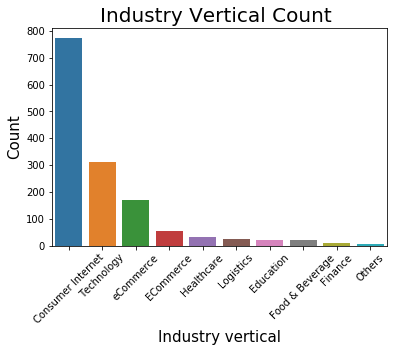

In [68]:
plt.figure()
sns.barplot(x=startup_vertical.index[:10], y=startup_vertical.values[:10])
plt.xticks(rotation=45)
plt.xlabel('Industry vertical', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title("Industry Vertical Count ", fontsize=20)

In [71]:
#remarks exploration
startup_remarks = startup['Remarks'].value_counts()[:10]

In [72]:
startup_remarks

Series A                          177
Series B                           64
Pre-Series A                       37
Series C                           28
Strategic Investment               11
Series D                           11
Late Stage                         10
Strategic Funding                   6
pre-Series A                        6
At the 10 minute million event      6
Name: Remarks, dtype: int64

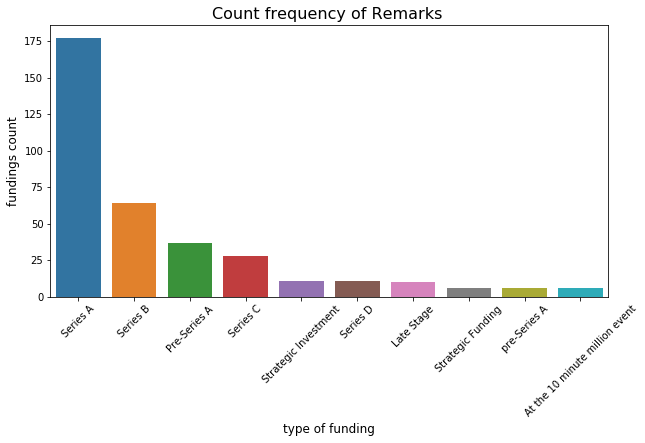

In [76]:
plt.figure(figsize=(10,5))
sns.barplot(x=startup_remarks.index[:10],y=startup_remarks.values[:10])
plt.xticks(rotation=45)
plt.xlabel('type of funding', fontsize=12)
plt.ylabel('fundings count', fontsize=12)
plt.title("Count frequency of Remarks ", fontsize=16)
plt.show()

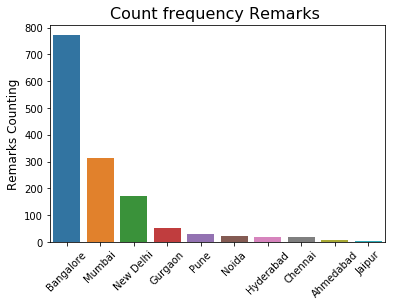

In [77]:
#relating type of funding eith city the startup belongs to
plt.figure()
sns.barplot(x=startup_location.index[:10], y=startup_vertical.values[:10])
plt.xticks(rotation=45)
plt.xlabel('', fontsize=12)
plt.ylabel('Remarks Counting', fontsize=12)
plt.title("Count frequency Remarks ", fontsize=16)
plt.show()